In [4]:
import psycopg2
import pandas as pd
import os

# Establish a connection to the database using environment variables
try:
    conn = psycopg2.connect(
        host=os.getenv("DB_HOST"),
        database=os.getenv("DB_NAME"),
        user=os.getenv("DB_USER"),
        password=os.getenv("DB_PASSWORD"),
        sslmode=os.getenv("DB_SSLMODE")
    )
    print("Connection to database established successfully.")
except Exception as e:
    print(f"An error occurred while connecting to the database: {e}")

# Query to fetch the ml_features dataset
query = "SELECT * FROM ml_features"

# Fetch the data into a pandas DataFrame
try:
    ml_features_df = pd.read_sql_query(query, conn)
    print("Data fetched successfully.")
except Exception as e:
    print(f"An error occurred while fetching data: {e}")
finally:
    # Close the connection
    conn.close()
    print("Database connection closed.")



Connection to database established successfully.


/var/folders/w4/5fjrknc54qjdkx2hts27gd6m0000gn/T/ipykernel_49823/3142652543.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ml_features_df = pd.read_sql_query(query, conn)


Data fetched successfully.
Database connection closed.


Evaluation Metrics for ADBE: MAE=6.47, MSE=86.46, R2=0.95


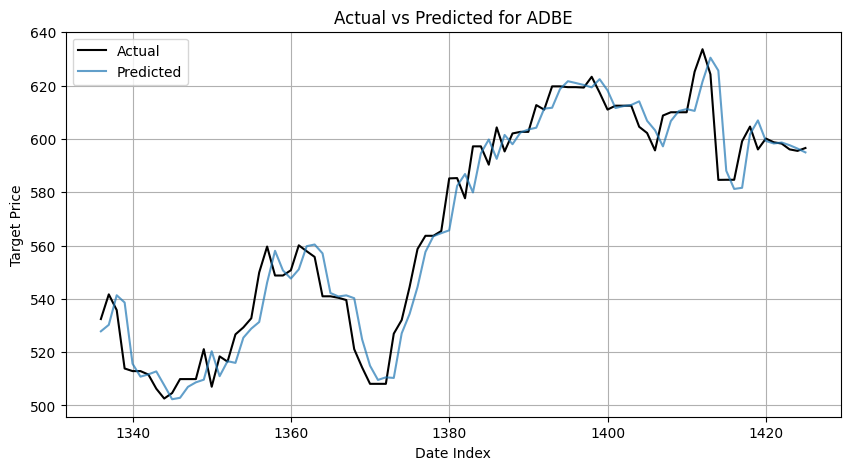

Evaluation Metrics for CMCSA: MAE=0.39, MSE=0.36, R2=0.80


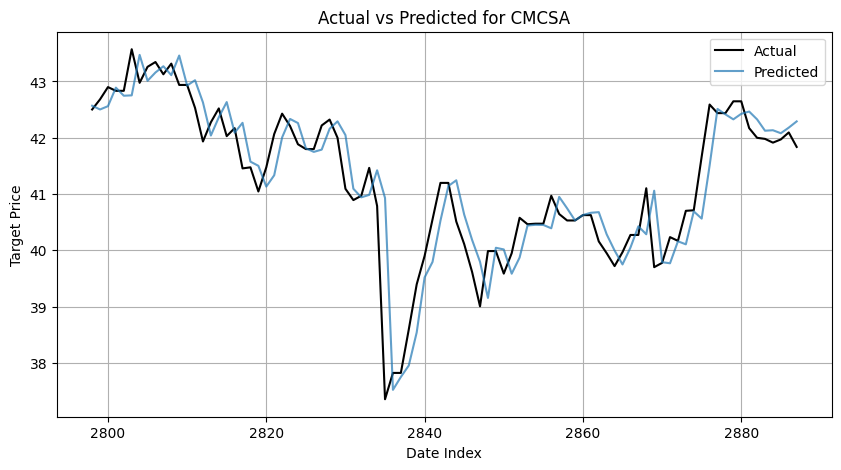

Evaluation Metrics for QCOM: MAE=1.12, MSE=2.50, R2=0.98


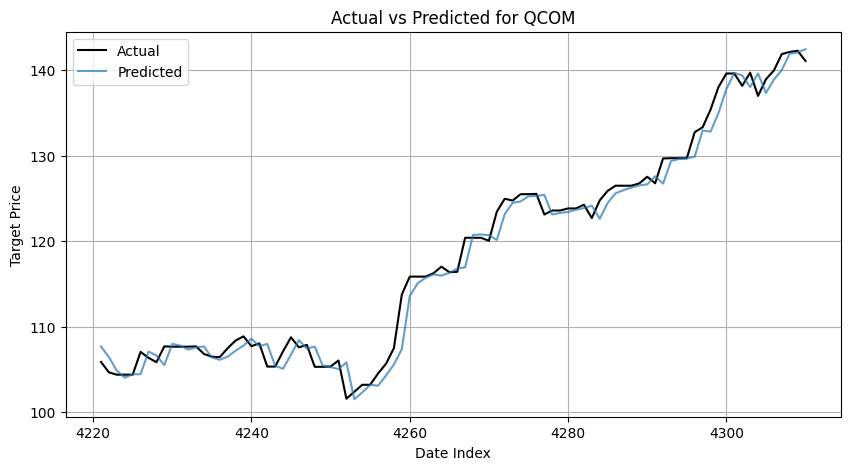

Evaluation Metrics for GOOG: MAE=1.30, MSE=4.68, R2=0.78


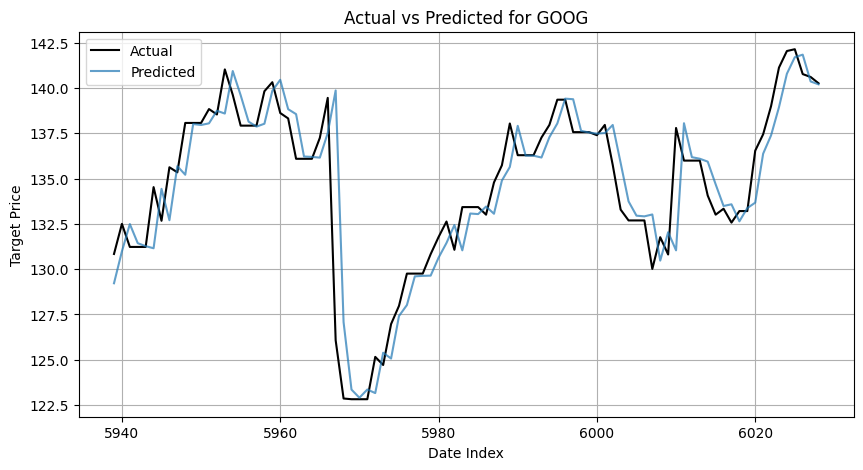

Evaluation Metrics for PEP: MAE=1.22, MSE=3.15, R2=0.84


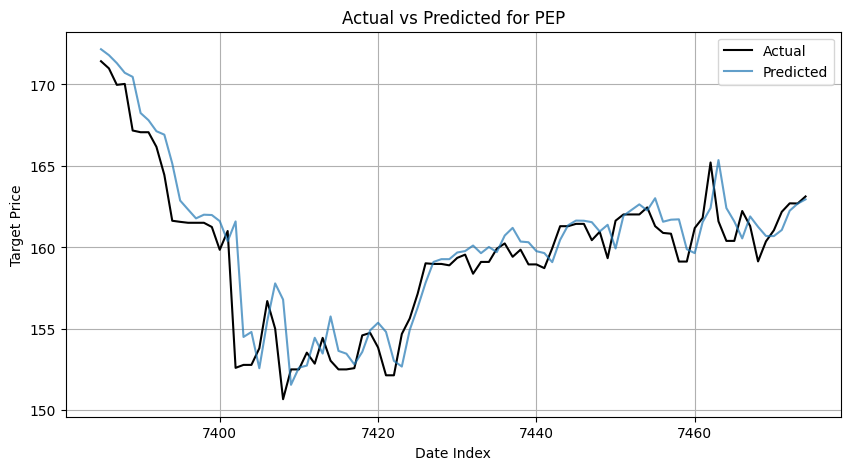

Evaluation Metrics for SBUX: MAE=0.86, MSE=1.79, R2=0.92


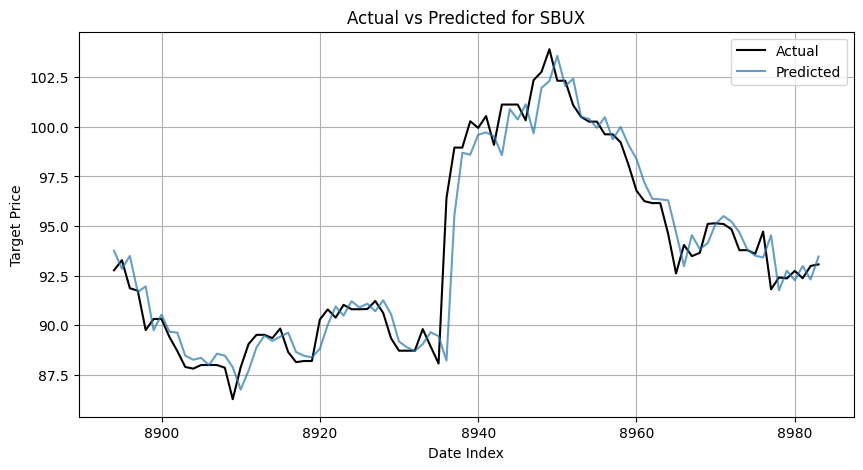

Evaluation Metrics for COST: MAE=4.78, MSE=50.07, R2=0.96


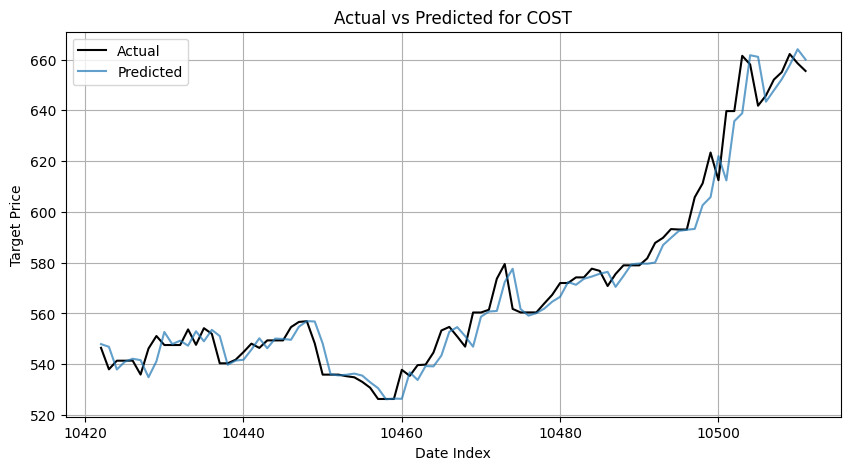

Evaluation Metrics for AMD: MAE=1.70, MSE=7.17, R2=0.97


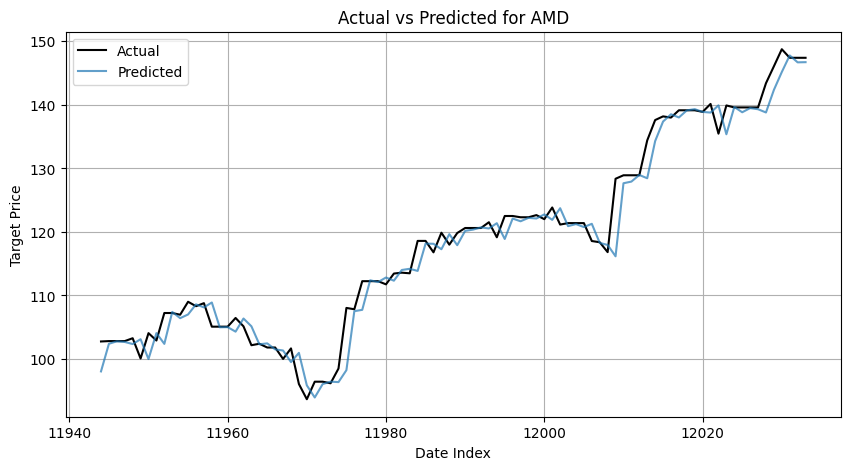

Evaluation Metrics for INTC: MAE=0.66, MSE=0.85, R2=0.96


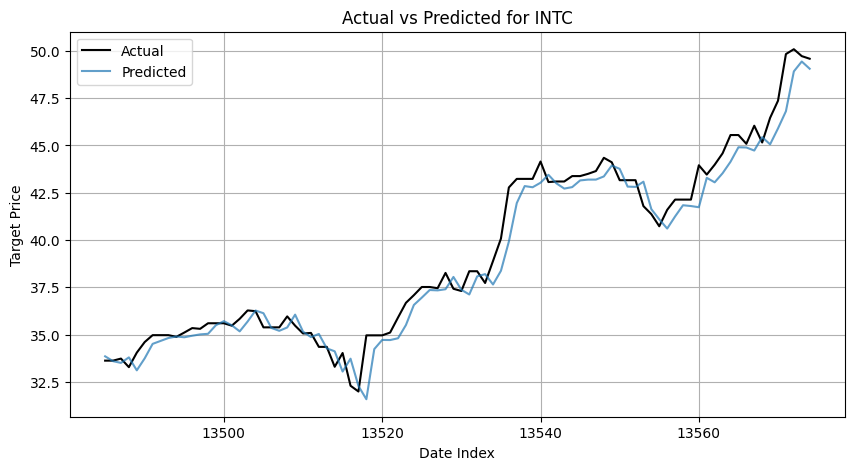

Evaluation Metrics for PYPL: MAE=0.81, MSE=1.30, R2=0.86


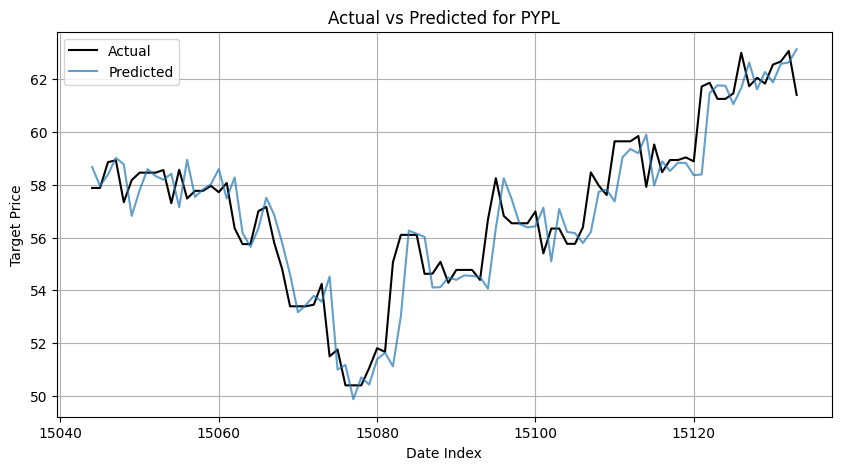

In [5]:

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract unique stock symbols
stock_symbols = ml_features_df['stock_symbol'].unique()

# Dictionary to store models, predictions, and evaluation metrics
models = {}
predictions = {}
evaluation_metrics = {}

# Iterate over each stock symbol
for symbol in stock_symbols:
    # Filter data for the current stock symbol
    stock_data = ml_features_df[ml_features_df['stock_symbol'] == symbol]
    
    # Sort by date to ensure time order
    stock_data = stock_data.sort_values(by='date')
    
    # Define features and target
    X = stock_data.drop(columns=['date', 'stock_symbol', 'target'])
    y = stock_data['target']
    
    # Split the data into training and prediction sets
    X_train, X_pred = X.iloc[:-90], X.iloc[-90:]
    y_train, y_pred_actual = y.iloc[:-90], y.iloc[-90:]
    
    # Train Linear Regression model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # Store the model
    models[symbol] = linreg
    
    # Predict on the last 90 days
    y_pred = linreg.predict(X_pred)
    predictions[symbol] = y_pred
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_pred_actual, y_pred)
    mse = mean_squared_error(y_pred_actual, y_pred)
    r2 = r2_score(y_pred_actual, y_pred)
    evaluation_metrics[symbol] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {symbol}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_pred_actual.index, y_pred_actual, label='Actual', color='black')
    plt.plot(y_pred_actual.index, y_pred, label='Predicted', alpha=0.7)
    plt.title(f"Actual vs Predicted for {symbol}")
    plt.xlabel("Date Index")
    plt.ylabel("Target Price")
    plt.legend()
    plt.grid(True)
    plt.show()


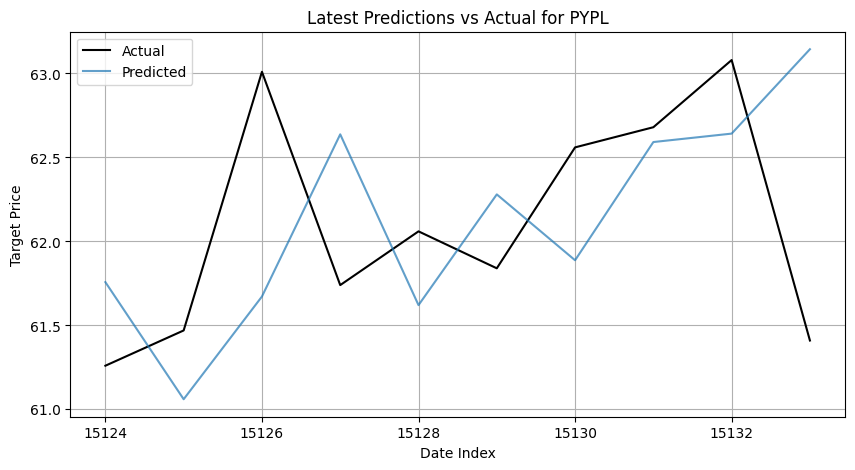

In [6]:
# Zoom into the latest few predictions for PYPL
symbol = 'PYPL'

# Check if predictions for PYPL exist
if symbol in predictions:
    # Get the last few predictions
    latest_predictions = predictions[symbol][-10:]  # Adjust the number as needed

    # Get the corresponding actual values
    latest_actuals = y_pred_actual[-10:]  # Adjust the number as needed

    # Plot the latest predictions vs actual values
    plt.figure(figsize=(10, 5))
    plt.plot(latest_actuals.index, latest_actuals, label='Actual', color='black')
    plt.plot(latest_actuals.index, latest_predictions, label='Predicted', alpha=0.7)
    plt.title(f"Latest Predictions vs Actual for {symbol}")
    plt.xlabel("Date Index")
    plt.ylabel("Target Price")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No predictions available for {symbol}")
